Задача про кораблики

In [3]:
from deap import base, algorithms
from deap import creator
from deap import tools

import algelitism

import random
import matplotlib.pyplot as plt
import numpy as np

gen	nevals	min     	avg    
0  	200   	0.077887	137.504
1  	178   	0.077887	65.6455
2  	178   	0.077887	33.9244
3  	181   	0.077887	20.7587
4  	183   	0.0392467	20.2488
5  	186   	0.00496546	15.317 
6  	178   	0.00496546	8.57341
7  	174   	0.00331527	13.0142
8  	181   	0.00195266	9.44393
9  	167   	0.00132252	5.62497
10 	187   	0.000601159	5.23628
11 	168   	0.000601159	5.16579
12 	176   	0.000595173	3.73966
13 	187   	0.000584573	0.869731
14 	177   	0.000442491	1.68745 
15 	172   	0.000431091	2.18181 
16 	175   	0.000431091	1.68823 
17 	176   	0.000314617	1.75943 
18 	187   	0.000313926	2.46541 
19 	169   	0.000308357	0.962328
20 	173   	0.000308269	4.29568 
21 	182   	0.000244485	1.6645  
22 	180   	0.000244485	3.1337  
23 	177   	0.000239511	1.29416 
24 	169   	0.00022905 	3.34391 
25 	179   	0.000224357	2.22677 
26 	175   	0.000224155	2.43633 
27 	179   	0.000224155	2.726   
28 	179   	0.000222024	3.01859 
29 	168   	0.000221898	0.784885
30 	180   	0.000221549	2.75776 
31 	174   	0

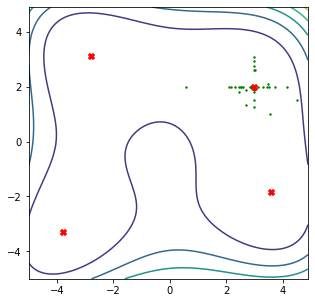

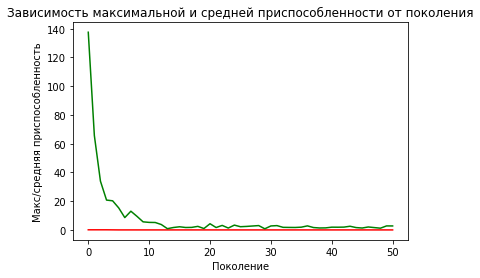

In [2]:
LOW, UP = -5, 5
ETA = 20
LENGTH_CHROM = 2    # длина хромосомы, подлежащей оптимизации

# константы генетического алгоритма
POPULATION_SIZE = 200   # количество индивидуумов в популяции
P_CROSSOVER = 0.9       # вероятность скрещивания
P_MUTATION = 0.2        # вероятность мутации индивидуума
MAX_GENERATIONS = 50    # максимальное количество поколений
HALL_OF_FAME_SIZE = 5

hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

RANDOM_SEED = 42
random.seed(RANDOM_SEED)

creator.create("FitnessMin", base.Fitness, weights=(-1.0,))
creator.create("Individual", list, fitness=creator.FitnessMin)


def randomPoint(a, b):
    return [random.uniform(a, b), random.uniform(a, b)]


toolbox = base.Toolbox()
toolbox.register("randomPoint", randomPoint, LOW, UP)
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomPoint)
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

population = toolbox.populationCreator(n=POPULATION_SIZE)


def himmelblau(individual):
    x, y = individual
    f = (x ** 2 + y - 11) ** 2 + (x + y ** 2 - 7) ** 2
    return f,

toolbox.register("evaluate", himmelblau)
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxSimulatedBinaryBounded, low=LOW, up=UP, eta=ETA)
toolbox.register("mutate", tools.mutPolynomialBounded, low=LOW, up=UP, eta=ETA, indpb=1.0/LENGTH_CHROM)

stats = tools.Statistics(lambda ind: ind.fitness.values)
stats.register("min", np.min)
stats.register("avg", np.mean)


import time
def show(ax, xgrid, ygrid, f):
    ptMins = [[3.0, 2.0], [-2.805118, 3.131312], [-3.779310, -3.283186], [3.584458, -1.848126]]

    ax.clear()
    ax.contour(xgrid, ygrid, f)
    ax.scatter(*zip(*ptMins), marker='X', color='red', zorder=1)
    ax.scatter(*zip(*population), color='green', s=2, zorder=0)

    plt.draw()
    plt.gcf().canvas.flush_events()

    time.sleep(0.2)


x = np.arange(-5, 5, 0.1)
y = np.arange(-5, 5, 0.1)
xgrid, ygrid = np.meshgrid(x, y)

f_himmelbalu = (xgrid**2 + ygrid - 11)**2 + (xgrid + ygrid**2 - 7)**2

plt.ion()
fig, ax = plt.subplots()
fig.set_size_inches(5, 5)

ax.set_xlim(LOW-3, UP+3)
ax.set_ylim(LOW-3, UP+3)

#algelitism.eaSimpleElitism
#algorithms.eaSimple
population, logbook = algelitism.eaSimpleElitism(population, toolbox,
                                                 cxpb=P_CROSSOVER,
                                                 mutpb=P_MUTATION,
                                                 ngen=MAX_GENERATIONS,
                                                 halloffame=hof,
                                                 stats=stats,
                                                 callback=(show, (ax, xgrid, ygrid, f_himmelbalu)),
                                                 verbose=True)

maxFitnessValues, meanFitnessValues = logbook.select("min", "avg")

best = hof.items[0]
print(best)

plt.ioff()
plt.show()

plt.plot(maxFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Поколение')
plt.ylabel('Макс/средняя приспособленность')
plt.title('Зависимость максимальной и средней приспособленности от поколения')
plt.show()